In [1]:
import jupyterthemes as jt
from jupyterthemes.stylefx import set_nb_theme

set_nb_theme('chesterish')

In [2]:
#load libraries 
import time,os
from matplotlib.offsetbox import AnchoredText
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines, numpy as np, math, pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas

#from toggle_cell import hide_cell 
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

viridis = cm.get_cmap('viridis', 12)
inferno = cm.get_cmap('inferno', 12)
autumn = cm.get_cmap('autumn', 12)

#physical_devices = tf.config.list_physical_devices('GPU')
#tf.config.experimental.set_memory_growth(physical_devices[0], True)
#tf.config.experimental.set_memory_growth(physical_devices[1], True)
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=15)
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)
rc('legend', fontsize=15)

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

import root_pandas,glob

import gc

import uproot
def read_n(pattern, n):
    if not '*' in pattern:
        a = root_pandas.read_root(pattern,chunksize=int(n))
    else:
        a = root_pandas.read_root(glob.glob(pattern),chunksize=int(n))
    for b in a:
        del a
        print(n)
        return b

from scipy.optimize import curve_fit

image_dir='images'

import misc_util#correlation_plots

import R2h_module
import imp
imp.reload(R2h_module)

import mplhep as hep
hep.style.use("CMS")

/home/sebouh/.local/lib/python3.8/site-packages/uproot3/__init__.py:127: FutureWarning: Consider switching from 'uproot3' to 'uproot', since the new interface became the default in 2020.

    pip install -U uproot

In Python:

    >>> import uproot
    >>> with uproot.open(...) as file:
    ...

  warnings.warn(
/home/sebouh/.local/lib/python3.8/site-packages/awkward0/__init__.py:12: FutureWarning: Consider switching from 'awkward0' to 'awkward', since the new interface became the default in 2020.

    pip install -U awkward

In Python:

    >>> import awkward as ak
    >>> new_style_array = ak.from_awkward0(old_style_array)
    >>> old_style_array = ak.to_awkward0(new_style_array)

  warnings.warn(


In [3]:
#sets =  "D_C C D_Fe Fe Pb D_Pb".split()
#sets += "MC_D2 MC_C MC_Fe MC_Pb".split()
#sets += "no_ecuts_D_C no_ecuts_C no_ecuts_D_Fe no_ecuts_Fe no_ecuts_Pb no_ecuts_D_Pb".split()
#sets += "xQ2_D_C xQ2_C xQ2_D_Fe xQ2_Fe xQ2_Pb xQ2_D_Pb".split()

#dfs_mixed = {a : root_pandas.read_root("../../eg2/python/mixed_%s.root"%a)  for a in sets}

#mixtag='xQ2_'
#dfs_mixed = {a : root_pandas.read_root(f"/data/sebouh/eg2/python/mixed_{mixtag}{a}.root")  for a in "D_C C D_Fe Fe Pb D_Pb".split()}


In [4]:
def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

In [5]:
%%time
dfs_pair = {}
dfs_trigger = {}
#path_data="/home/sebouh/di-hadron"
path_data="/home/seba/di-hadron/P27"
for target in ['C','Fe','Pb']:
    print ('Getting dataframes from target %s'%target)
    dfs_pair[target]=getdatainChunks('%s/Pairs_%s.root'%(path_data,target), target)
    dfs_pair['D_%s'%target]= getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 'D_%s'%target)  
    print ('Get trigger dataframes from deuterium target %s'%target)
    dfs_trigger['%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                      '%s_trigger'%target)
    dfs_trigger['D_%s'%target] = getdatainChunks('%s/Pairs_%s.root'%(path_data,target), 
                                                        'D_%s_trigger'%target)

Getting dataframes from target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target C


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Fe


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Getting dataframes from target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Get trigger dataframes from deuterium target Pb


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)
/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


CPU times: user 5.7 s, sys: 1.7 s, total: 7.4 s
Wall time: 7.75 s


In [6]:
#get GiBUU
import uproot

def getdatainChunks(filename,treename):
    dataframe =pd.DataFrame()
    file = uproot.open(filename) 
    tree=file[treename]
    df=tree.arrays(filter_name='*',library='pd')
    return df

pathGIBUU="./"
for target in ['D','C','Fe','Pb']:
    for suffix in "", "_tweak", "_tweak2","_tweak_harut":
        #GiBUU
        print (target+suffix)
        print (' trigger')
        dfs_trigger['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix), 
                                                               '%s_trigger'%target)
        print (' pairs')
        dfs_pair['GiBUU_%s'%target+suffix]= getdatainChunks('%sGiBUU_Pairs_%s.root'%(pathGIBUU,target+suffix),target)
print (dfs_trigger.keys())

D
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


D_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


C_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Fe_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb_tweak
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb_tweak2
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


Pb_tweak_harut
 trigger


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


 pairs


/home/sebouh/.local/lib/python3.8/site-packages/uproot/interpretation/library.py:719: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  return (getattr(pandas, "RangeIndex", pandas.Int64Index), pandas.Int64Index)


dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])


In [7]:
for dct in dfs_pair, dfs_trigger:
    print(dct.keys())
    dct['D'] = pd.concat([dct['D_'+a] for a in 'C Fe Pb'.split()])

dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])
dict_keys(['C', 'D_C', 'Fe', 'D_Fe', 'Pb', 'D_Pb', 'GiBUU_D', 'GiBUU_D_tweak', 'GiBUU_D_tweak2', 'GiBUU_D_tweak_harut', 'GiBUU_C', 'GiBUU_C_tweak', 'GiBUU_C_tweak2', 'GiBUU_C_tweak_harut', 'GiBUU_Fe', 'GiBUU_Fe_tweak', 'GiBUU_Fe_tweak2', 'GiBUU_Fe_tweak_harut', 'GiBUU_Pb', 'GiBUU_Pb_tweak', 'GiBUU_Pb_tweak2', 'GiBUU_Pb_tweak_harut'])


In [8]:
%%time
import R2h_module as r2h

for key in dfs_pair.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True
    print ('\nkey: ',key)
    dfs_pair[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_pair[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    dfs_pair[key] = r2h.applyCuts(dfs_pair[key],isMC=isMC, nomCuts=True)
    dfs_pair[key] = r2h.applyCutsPair(dfs_pair[key],isMC=isMC, nomCuts=True)


key:  C
Entries before cut  131591

key:  D_C
Entries before cut  185530

key:  Fe
Entries before cut  44134

key:  D_Fe
Entries before cut  96623

key:  Pb
Entries before cut  47790

key:  D_Pb
Entries before cut  281133

key:  GiBUU_D
Entries before cut  2099630

key:  GiBUU_D_tweak
Entries before cut  2477374

key:  GiBUU_D_tweak2
Entries before cut  2406048

key:  GiBUU_D_tweak_harut
Entries before cut  2348393

key:  GiBUU_C
Entries before cut  2226123

key:  GiBUU_C_tweak
Entries before cut  217064

key:  GiBUU_C_tweak2
Entries before cut  2123874

key:  GiBUU_C_tweak_harut
Entries before cut  2074556

key:  GiBUU_Fe
Entries before cut  1014645

key:  GiBUU_Fe_tweak
Entries before cut  478970

key:  GiBUU_Fe_tweak2
Entries before cut  380751

key:  GiBUU_Fe_tweak_harut
Entries before cut  880242

key:  GiBUU_Pb
Entries before cut  1148422

key:  GiBUU_Pb_tweak
Entries before cut  526426

key:  GiBUU_Pb_tweak2
Entries before cut  512026

key:  GiBUU_Pb_tweak_harut
Entries before 

In [9]:
for key in dfs_trigger.keys():
    isMC = False
    if 'GiBUU' in key:
        isMC=True    
    print (key, isMC)
    dfs_trigger[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
    dfs_trigger[key] = r2h.applyCuts(dfs_trigger[key],isTrigger=True, isMC=isMC, nomCuts=True)
    print (' ')
    

C False
Entries before cut  652690
 
D_C False
Entries before cut  875478
 
Fe False
Entries before cut  370123
 
D_Fe False
Entries before cut  667932
 
Pb False
Entries before cut  284036
 
D_Pb False
Entries before cut  1352263
 
GiBUU_D True
Entries before cut  2047709
 
GiBUU_D_tweak True
Entries before cut  2305484
 
GiBUU_D_tweak2 True
Entries before cut  2233337
 
GiBUU_D_tweak_harut True
Entries before cut  2235641
 
GiBUU_C True
Entries before cut  2011729
 
GiBUU_C_tweak True
Entries before cut  191519
 
GiBUU_C_tweak2 True
Entries before cut  1849650
 
GiBUU_C_tweak_harut True
Entries before cut  1841015
 
GiBUU_Fe True
Entries before cut  874492
 
GiBUU_Fe_tweak True
Entries before cut  406572
 
GiBUU_Fe_tweak2 True
Entries before cut  319068
 
GiBUU_Fe_tweak_harut True
Entries before cut  749066
 
GiBUU_Pb True
Entries before cut  999262
 
GiBUU_Pb_tweak True
Entries before cut  459072
 
GiBUU_Pb_tweak2 True
Entries before cut  440139
 
GiBUU_Pb_tweak_harut True
Entries b

In [10]:
# import R2h_module
# import imp
# imp.reload(R2h_module)
# for key in list(dfs_mixed.keys()):
#     isMC=False
#     if 'GiBUU' in key:
#         isMC=True
#     dfs_mixed[key].rename(columns={'h1_FidCut':'h1_FidCutPiPlus'}, inplace=True)
#     dfs_mixed[key].rename(columns={'h2_FidCut':'h2_FidCutPiPlus'}, inplace=True)
    
#     print(f"\n\n{key}")
#     if  'dphi' not in dfs_mixed[key].columns:
#         dfs_mixed[key].eval('diff_phi_cm = h1_cm_ph-h2_cm_ph', inplace=True)
#         dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm-{2*np.pi}*(diff_phi_cm>{np.pi})', inplace=True)
#         dfs_mixed[key].eval(f'diff_phi_cm = diff_phi_cm+{2*np.pi}*(diff_phi_cm<{-np.pi})', inplace=True)
#         dfs_mixed[key].eval(f'dphi = abs(diff_phi_cm)', inplace=True)
#     dfs_mixed[key].eval('h1_e=nu*h1_z',inplace=True)
#     dfs_mixed[key].eval('h2_e=nu*h2_z',inplace=True)
#     dfs_mixed[key].eval(f'drap=0.5*log((h1_e+sqrt(h1_p**2-h1_cm_pt**2))/(h1_e-sqrt(h1_p**2-h1_cm_pt**2)))-0.5*log((h2_e+sqrt(h2_p**2-h2_cm_pt**2))/(h2_e-sqrt(h2_p**2-h2_cm_pt**2)))',inplace=True)

#     mixed_trigger_cuts = dfs_mixed[key]#R2h_module.applyCuts(dfs_mixed[key])    
#     dfs_mixed[key] = R2h_module.applyCutsPair(mixed_trigger_cuts,isMC=isMC,
#                                                              nomCuts=True,h2Proton=False, minPt=np.sqrt(0.005))
    
    

In [11]:
#dfs_mc= {f"{a}_2pi":root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_{a}.root",a) for a in "C Fe Pb".split()}
#dfs_mc["D_2pi"] = root_pandas.read_root(f"/home/sebouh/CreatePairTuples/MC_Pairs_weighted_C.root","D_C")

# Cuts used in PRL

In [12]:
#cuts used in the PRL paper
dpionMassBins=11
maxzmass=1.7
minzmass=0.3

dpiondphiBins=9
maxdphi=3.14
mindphi=0.0

dpionz2Bins=9
maxz2=0.45
minz2=0.05


p_thr=2.7
Nphe_thr=5
Nphe_h1_cut='h1_Nphe> (%d*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Nphe_h2_cut='h2_Nphe> (%d*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(Nphe_thr,p_thr,p_thr,p_thr,p_thr)                    
Chi2CC_h1_cut='h1_Chi2CC < (0.08726*( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) +10000* (not ( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
Chi2CC_h2_cut='h2_Chi2CC < (0.08726*( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) +10000* (not ( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) ) )'%(p_thr,p_thr,p_thr,p_thr)
StatCC_h1_cut='h1_StatCC>((( (h1_z*nu*h1_z*nu-0.13957*0.13957)>(%f*%f) and h1_pid==211 ) -1 ))'%(p_thr,p_thr)
StatCC_h2_cut='h2_StatCC>((( (h2_z*nu*h2_z*nu-0.13957*0.13957)>(%f*%f) and h2_pid==211 ) -1 ))'%(p_thr,p_thr)

#pair_cut_nom  ='and h1_th<90 and h1_th>10 and h2_th<90 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
#trigger_cut_nom   ='h1_z>0.5 and h1_th<90 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

PRL_pair_cut_nom  =' and h1_th>10 and h2_th>10 and h1_z>0.5 and h2_z>%s and h2_z<%s and pair_mass<%s and pair_mass>%s and (h1_z+h2_z)<1.0 and (h1_pid*h2_pid)<0.  and abs(h2_deltaZ)<3.0 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and h2_FidCutPiPlus==1 and %s and %s and %s and %s and %s and %s'%(minz2,maxz2,maxzmass ,minzmass, Nphe_h1_cut, Nphe_h2_cut,Chi2CC_h1_cut,Chi2CC_h2_cut,StatCC_h1_cut, StatCC_h2_cut)
PRL_trigger_cut_nom   ='h1_z>0.5 and h1_th>10 and abs(h1_deltaZ)<3.0 and TargType!=0 and SampFracEl25==1 and h1_FidCutPiPlus==1 and %s and %s and %s  '%(Nphe_h1_cut, Chi2CC_h1_cut,StatCC_h1_cut)

In [13]:
for df in list(dfs_pair.values())+ list(dfs_trigger.values()):
    h1_pz= "sqrt(h1_p**2-h1_cm_pt**2)*(2*(h1_rap>0)-1)"
    theta_e="2*arcsin(sqrt(Q2/(4*5.014*(5.014-nu))))"
    theta_q=f'arctan2((5.014-nu)*sin({theta_e}),(5.014-(5.014-nu)*cos({theta_e})))'
    theta_qe=f"{theta_q}+{theta_e}"
    e_pz = f"((5.014-nu)*cos(theta_qe))"
    e_pt = f"((5.014-nu)*sin(theta_qe))"
    
    df['theta_e'] = df.eval(theta_e)
    df['theta_qe'] = df.eval(theta_qe)
    df['e_q_pz'] = df.eval(e_pz)
    df['e_q_pt'] = df.eval(e_pt)
    dtheta_epi1=f"""arccos((e_px*h1_px+e_py*h1_py+e_pz*h1_pz)
                          /sqrt(e_px**2+e_py**2+e_pz**2)
                          /sqrt(h1_px**2+h1_py**2+h1_pz**2))*{180/np.pi}""".replace("\n", "")

    df['dtheta_epi1']  = df.eval(f"arccos((cos(theta_qe)*{h1_pz}+sin(theta_qe)*h1_cm_pt*cos(h1_cm_ph))/h1_p)*{180/np.pi}")

In [14]:
# additional cuts that were not applied to the GiBUU set in PRL,
# but we should see what happens if we include them.  
pThetaCuts_trig=' ((h1_pid==211 and h1_th>10) or (h1_pid==-211) and ((h1_th>25 and h1_p>0.7) or (h1_p>0.5 & h1_th>30) or (h1_th>40)))'

#pThetaCuts_trig+=" and h1_th>20 and h1_p<2.7"

pThetaCuts_pair=pThetaCuts_trig 
pThetaCuts_pair += " and " + pThetaCuts_trig.replace("h1_", "h2_").replace("h2_th", "h2_th*180/3.1415926535")



In [15]:
# def mix_corr_alt(df):
#     nbins=16
#     subbins = 10

#     ntotbins=nbins*subbins
#     y1, x =np.histogram(df.h1_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))
#     y2, x =np.histogram(df.h2_cm_ph, bins=np.linspace(-np.pi, np.pi, nbins*subbins+1))   
#     x=(x[:-1]+x[1:])/2
#     #print(y1)
#     ym=[0]*len(y1)
#     #print(len(y1), len(ym))
#     for i in range(len(y1)):
#         for j in range(len(y2)):
#             ym[(i-j+len(y1)//2+4*ntotbins)%ntotbins]+=y1[i]*y2[j]+y1[j]*y2[i]
#     #ym=[sum(ym[i*subbins:(i+1)*subbins]) for i in range(nbins)]
    
#     ym=[sum(ym[i*subbins:(i+1)*subbins])+sum(ym[ntotbins-(i+1)*subbins:ntotbins-i*subbins]) for i in range(nbins)]
#     ym/=sum(ym)/len(ym)
#     return ym[len(ym)//2:]
# pid=211; pT1min=.25; pT2min=.25; pMin=0.35
# q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
#                  f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
# plt.plot(np.linspace(np.pi/16, 15*np.pi/16, 8), mix_corr_alt(dfs_pair["D"].query(q)))

In [16]:
def get_values(slicevar='drap', slicevartex='\Delta Y', slicebins=(-1,0,1,2,3), 
               dropLeadPiMinus=True, usePRLcuts=False, saveFig=False,
              pThetaCutsGiBUU=True, pMin=.350, pT1min=.25, pT2min=.25,
               suptitle=None,nbins_data=8, nbins_GiBUU=16, GiBUU_suffix="",
              addCuts=None, addCutsTrig=None, divideByMix=False, sliceNh=False):
    #unbinned.
    if slicevar is None:
        slicebins=[0,1]
    
    pids = [211, -211]
    
    data=[]
    GiBUU=[]
    sliceinfo={}
    
    #guess for the systematic errors from sources not inves
    systPct=0
    pid=211
    
    for k in range(len(slicebins)-1):
        data.append({})
        GiBUU.append({})
        slice_range=slicebins[k:k+2]

        integral_data_D = 0
        data_D=None
        stat_D=None
        if usePRLcuts: #use separate calculation for D data gained with each
                       #nuclear target, just like in the PRL
            Alist= zip((0, -1, 1,-1,2, -1,3), "D D_C C D_Fe Fe D_Pb Pb".split())
        else:
            Alist = enumerate("D C Fe Pb".split())
        for i, A in Alist:

            

            q = f"h1_pid=={pid}  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and "+\
                 f"h2_cm_pt > {pT2min} and h1_z>0.5 and h2_pid=={-pid} and h2_p>{pMin}"
            #q += " and h1_p<2.7"
            #q+= " and h1_p<2.7 and h2_p>0.5 and h1_cm_pt>0.3 and h2_cm_pt>0.3"
            if usePRLcuts:
                #the dtheta_epi1 cut is a useless one, but we used it in the PRL paper,
                #so we need this in order to make the comparison
                q = "dtheta_epi1>25 and h2_z>0.05 and h2_z<0.45 and " + PRL_trigger_cut_nom + PRL_pair_cut_nom 

            if slicevar != None:
                q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCuts is not None:
                q+= f" and {addCuts}"

            which_set = "D_Pb" if A=="D" and usePRLcuts else A
            #which_set=A

            bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins_data+1)

            N2, x = np.histogram(dfs_pair[which_set].query(q)['dphi'], bins=bins)
            #if usePRLcuts:
            #    q = "h2_z>0.05 and h1_z>0.5"
            #N2mix, x = np.histogram(dfs_mixed["D" if usePRLcuts else A].query(q)['dphi'], bins=bins)

            #M_alt = mix_corr_alt(dfs_mixed[A].query(q))
            
            qtrig = pThetaCuts_trig+f" and h1_pid=={pid} and  h1_cm_pt > {pT1min}"
            if usePRLcuts:
                qtrig = "dtheta_epi1>25 and " + PRL_trigger_cut_nom
            
            if sliceNh:
                qtrig+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
            
            if addCutsTrig is not None:
                qtrig += f" and {addCutsTrig}"
            
            N1 = len(dfs_trigger[which_set].query(qtrig))

            x = (x[1:]+x[:-1])/2
            dx = x[1]-x[0]

            S = N2/dx/N1/2
            dSstat = np.sqrt(N2*(N1-N2)/N1**3)/dx/2

            #M = N2mix/(sum(N2mix)/len(N2mix))
            #dMstat = np.sqrt(N2mix)/(sum(N2mix)/len(N2mix))

            #M_err = np.sqrt(np.mean((M-1)**2))/2
            #print((A,pid,k),"estimated syst error from event mixing",  M_err)
            #if divideByMix:
            #    C = S/M
            #    dCstat = dSstat/M
            #else :
            C=S
            dCstat = dSstat
            


            if A=="D" or "D_" in A:  
                integral_data_D=sum(C)*dx*2

            dCsyst = C*systPct/100
            C/=integral_data_D
            dCstat/=integral_data_D
            dCsyst/=integral_data_D

            if A=='D' or "D_" in A:
                data_D=C
                stat_D=dCstat

            R_data = C/data_D
            dR_data_stat = C/data_D*np.hypot(dCstat/C, stat_D/data_D)
            dCtot = np.hypot(dCstat, dCsyst)

            
            data[k][A] = pd.DataFrame(dict(C=C, dCstat=dCstat, dCsyst=dCsyst, 
                                            phi=x,phi_low=bins[:-1], phi_up=bins[1:],
                                                S=S, dSstat=dSstat,
                                                R=R_data,
                                                dRstat=dR_data_stat, dRsyst=R_data*0.0,
                                        N2h=N2, N1=[N1]*len(N2)))
            if "D_" in A:
                continue

            #GiBUU
            # do the GiBUU twice: once with the same number of bins as the data,
            # and then with a finer binning
        
        for useFinerBinning in False, True:
            integral_GiBUU_D = 0
            GiBUU_D=None
            for i, A in enumerate("D C Fe Pb".split()):
            
                nbins = nbins_data if not useFinerBinning else nbins_GiBUU
                bins = np.linspace(0,np.pi if not usePRLcuts else 3.14,nbins+1)
                q = f"h1_pid=={pid} and h1_z>0.5  and h2_z>0.05 and h2_z<0.45 and h1_cm_pt > {pT1min} and h2_cm_pt > {pT2min} and h2_pid=={-pid}"
                if usePRLcuts:
                    q = "h2_z>0.05 and h1_z>0.5 and h2_z<0.45"
                if slicevar != None:
                    q+= f" and {slicevar}>={slice_range[0]} and {slicevar}<{slice_range[1]}"
                if pThetaCutsGiBUU:
                    q += " and " + pThetaCuts_pair + f" and h2_p>{pMin}"


                N2, x = np.histogram(dfs_pair[f"GiBUU_{A}"+GiBUU_suffix].query(q)['dphi'], bins=bins)

                x = (x[1:]+x[:-1])/2
                dx =x[1]-x[0]

                qtrig = f"h1_pid=={pid}  and h1_z>0.5 "
                if usePRLcuts:
                    qtrig = "h1_pid==h1_pid"
                if pThetaCutsGiBUU:
                    qtrig += " and " + pThetaCuts_trig + f" and  h1_cm_pt > {pT1min}"
                N1 = len(dfs_trigger["GiBUU_"+A+GiBUU_suffix].query(qtrig))
                y = N2/N1/dx/2
                dy=y*np.sqrt(1/N2+1/N1)
                
                #print(N1, N2)
                if A=="D":
                    integral_GiBUU_D=sum(y)*dx*2

                y/=integral_GiBUU_D
                dy/=integral_GiBUU_D
                if A=="D" or "D_" in A:
                    GiBUU_D = pd.Series(y)
                R_GiBUU = y/GiBUU_D

                tmp = A + "_fine" if useFinerBinning else A
                GiBUU[k][tmp] = pd.DataFrame(dict(C=y,dCstat=dy, R=y/GiBUU_D,
                                                phi=x, 
                                                 phi_low=bins[:-1], phi_up=bins[1:]))
            
            

        if slicevar is not None:
            sliceinfo[k] = f"{slice_range[0]:.2f} < ${slicevartex}$< {slice_range[1]:.2f}"
            
        else :
            sliceinfo[k] = f""
                
    return data, GiBUU, sliceinfo

In [17]:
1

1

In [18]:
import copy


def apply_endcap_corrections(data):
    yD = data['D']['C']
    dyD = data['D']['dCstat']
    yC = data['C']['C']
    dyC = data['C']['dCstat']
    yFe = data['Fe']['C']
    dyFe = data['Fe']['dCstat']

    dx =  data['Fe']['phi'][1]-data['Fe']['phi'][0]
    
    # fraction of the events in the deuterium set that are actually from the endcaps
    # determined from Taisiya's note
    fAl=(len(dfs_pair['D_C'])*3.15+len(dfs_pair['D_Fe'])*2.37+len(dfs_pair['D_Fe'])*2.27)\
        /((len(dfs_pair['D_C'])+len(dfs_pair['D_Fe'])+len(dfs_pair['D_Fe']))*100)

    
    #yC*=sum(yD)/sum(yC)
    #yFe*=sum(yD)/sum(yFe)
    
    # use corrections assuming C(Al) is halfway between C(C) and C(Fe)
    yAl = (yC+yFe)/2
    
    # normalize this to the deuterium 
    #yAl *= sum(yD)/sum(yAl)
    
    # uncertainty from the stat uncertainty on the Al interpolation, 
    # and also from the interpolation itself
    dyAl = np.sqrt(1/(1/dyC**2+1/dyFe**2)+(yC-yFe)**2)/2
    yDcorr = (yD-fAl*yAl)
    dyDcorr= fAl*dyAl
    

    newIntegral =2*dx*sum(yDcorr)
    #print(f"EC correction: normalization effect:  {newIntegral}")
    dyDcorr/=newIntegral
    yDcorr/=newIntegral 
    
    data_corr = copy.deepcopy(data)
    data_corr['D']['C']=yDcorr
    data_corr['D']['dCsyst']=np.hypot(data_corr['D']['dCsyst'], dyDcorr)
    
    data_corr['D']['dCsyst_EC'] = dyDcorr
    
    for A in "C Fe Pb".split():
        data_corr[A]['R']/=yDcorr/yD
        data_corr[A]['dRstat']/=yDcorr/yD
        data_corr[A]['dRsyst_EC']=data_corr[A]['R']*dyDcorr/yDcorr
        data_corr[A]['dRsyst']= np.hypot(data_corr[A]['dRsyst'],data_corr[A]['dRsyst_EC'])
        
    data_corr['D']['C_correction_EC'] = yDcorr-yD
    
    data_corr['C']['C']/=newIntegral
    data_corr['Fe']['C']/=newIntegral
    data_corr['Pb']['C']/=newIntegral
    
    # to determine the systematic effect on the width,
    # first calculate the corrected value assuming C_Al=C_C,
    # and then do the same assuming C_Al=C_Fe, and then take half the difference
    yDcorr_C = (yD-fAl*yC)/(2*dx*sum(yD-fAl*yC))
    yDcorr_Fe = (yD-fAl*yFe)/(2*dx*sum(yD-fAl*yFe))
    
    x=data['Fe']['phi']-np.pi
    sigmaD_C=np.sqrt(sum(yDcorr_C*x*x)/sum(yDcorr_C))
    sigmaD_Fe=np.sqrt(sum(yDcorr_Fe*x*x)/sum(yDcorr_Fe))
    data_corr['D_dwidth_syst_EC']=(sigmaD_C-sigmaD_Fe)/2
    sigmaDcorr=np.sqrt(sum(yDcorr*x*x)/sum(yDcorr))
    data_corr['D_width']=sigmaDcorr
    
    for A in "D C Fe Pb".split():
        dCstat=data_corr[A]['dCstat']
        C=data_corr[A]['C']
        sigma=np.sqrt(sum(C*x*x)/sum(C))
        data_corr[f'{A}_width']=sigma
        data_corr[f'{A}_dwidth_stat']=\
            np.sqrt(sum(dCstat**2*((x**2-sigma**2)/sum(C))**2))/(2*sigma)
    for A in "C Fe Pb".split():
        data_corr[A]['dCsyst_EC'] = 0
        data_corr[f'{A}_dwidth_syst_EC']=0
        sigmaA=data_corr[f'{A}_width']
        b=np.sqrt(sigmaA**2-sigmaDcorr**2)
        data_corr[f'{A}_dbroad_syst_EC']=data_corr['D_dwidth_syst_EC']*sigmaDcorr/b
        data_corr[f'{A}_broad']=b
        data_corr[f'{A}_dbroad_stat']=np.hypot(sigmaA*data_corr[f'{A}_dwidth_stat'],\
                                              sigmaDcorr*data_corr[f'D_dwidth_stat'])/b
            
    #print("systematic error on width from endcap:", data_corr['D_dwidth_syst_EC']\
    #      /((sigmaD_C+sigmaD_Fe)/2))
    
    return data_corr

In [19]:
#old version

# def add_syst_from_mixing(data):
#     for j in range(len(data)):
#         for A in "D C Fe Pb".split():
#             df = data[j][A]
#             add_syst=np.sqrt(np.mean((df.M-df.M_alt)**2/df.M**2))
#             df['dCsyst_mix']=add_syst*df.C
#             df.dCsyst=np.hypot(df.dCsyst, df['dCsyst_mix'])

In [20]:
all_data_uncorr={}
all_data={}
all_GiBUU={}
all_sliceinfo={}
GiBUU_suffix="_tweak_harut"
#GiBUU_suffix=""

In [21]:
def check(data_nom, data_alt):
    chi2=0
    N=0
    maxresid=0
    import scipy.stats
    for i, (nom, var) in enumerate(zip(data_nom, data_alt)):
        for A in "D C Fe Pb".split():
            diff=(var[A+"_width"]-nom[A+"_width"])
            stat=nom[A+"_dwidth_stat"]
            chi2+=diff**2/stat**2
            N+=1
            maxresid=max(maxresid, abs(diff/stat))
    print(f"chi2={chi2}, N={N}, p={scipy.stats.chi2.sf(chi2,N)}")
    print(f"max normed residual={maxresid}, {1-(1-2*scipy.stats.norm.sf(maxresid))**N}")



In [22]:
all_data_nom=[]
all_data_alt=[]
f1=0.9

In [23]:


data_nom, GiBUU, sliceinfo = get_values("drap", "\Delta Y", (-0.5, 0.5,1.5, 2.5),GiBUU_suffix=GiBUU_suffix)
data_nom = [apply_endcap_corrections(d) for d in data_nom]
data_alt, GiBUU_alt, sliceinfo = get_values("drap", "\Delta Y", (-0.45, 0.45,.55,1.45,1.55, 2.45),GiBUU_suffix=GiBUU_suffix)
data_alt=[data_alt[i] for i in [0, 2,4]]
data_alt = [apply_endcap_corrections(d) for d in data_alt]

all_data_nom+=data_nom
all_data_alt+=data_alt

check(data_nom, data_alt)

chi2=4.442342438653414, N=12, p=0.9740691672694364
max normed residual=1.4088118654015305, 0.874619913758025


In [24]:
data_nom, GiBUU, sliceinfo = get_values("h1_cm_pt", "p^T_{1}", (0.25, 0.4, 0.6, 1),
                                    GiBUU_suffix=GiBUU_suffix,sliceNh=True)
data_nom = [apply_endcap_corrections(d) for d in data_nom]

newbins=[(0.25+0.4)/2-f1*(0.4-0.25)/2,(0.25+0.4)/2+f1*(0.4-0.25)/2,
        (0.4+0.6)/2-f1*(0.6-0.4)/2,(0.4+0.6)/2+f1*(0.6-0.4)/2,
         (1.0+0.6)/2-f1*(1.0-0.6)/2,(1.0+0.6)/2+f1*(1.0-0.6)/2]
print("new bins", newbins)
data_alt, GiBUU, sliceinfo = get_values("h1_cm_pt", "p^T_{1}", newbins,
                                    GiBUU_suffix=GiBUU_suffix,sliceNh=True)
data_alt=[data_alt[i] for i in [0, 2,4]]
data_alt = [apply_endcap_corrections(d) for d in data_alt]

all_data_nom+=data_nom
all_data_alt+=data_alt

check(data_nom, data_alt)

new bins [0.2575, 0.3925, 0.41000000000000003, 0.59, 0.62, 0.9800000000000001]
chi2=5.690749862779829, N=12, p=0.9308618680069967
max normed residual=1.7932293101486656, 0.5969906611977854


In [25]:
data_nom, GiBUU, sliceinfo = get_values("h2_cm_pt", "p^T_{2}", (0.25, 0.4, 0.6, 0.8),
                                    GiBUU_suffix=GiBUU_suffix)
data_nom = [apply_endcap_corrections(d) for d in data_nom]

newbins=[(0.25+0.4)/2-f1*(0.4-0.25)/2,(0.25+0.4)/2+f1*(0.4-0.25)/2,
        (0.4+0.6)/2-f1*(0.6-0.4)/2,(0.4+0.6)/2+f1*(0.6-0.4)/2,
         (0.8+0.6)/2-f1*(0.8-0.6)/2,(0.8+0.6)/2+f1*(0.8-0.6)/2]
print("new bins", newbins)
data_alt, GiBUU, sliceinfo = get_values("h2_cm_pt", "p^T_{2}", newbins,
                                    GiBUU_suffix=GiBUU_suffix)
data_alt=[data_alt[i] for i in [0, 2,4]]
data_alt = [apply_endcap_corrections(d) for d in data_alt]

all_data_nom+=data_nom
all_data_alt+=data_alt

check(data_nom, data_alt)

new bins [0.2575, 0.3925, 0.41000000000000003, 0.59, 0.6099999999999999, 0.79]
chi2=2.613380773098278, N=12, p=0.9977124396375019
max normed residual=0.9806053843128547, 0.9913338341082075


In [26]:

check(all_data_nom, all_data_alt)

chi2=12.746473074531524, N=36, p=0.9998806588290892
max normed residual=1.7932293101486656, 0.9345446227779718


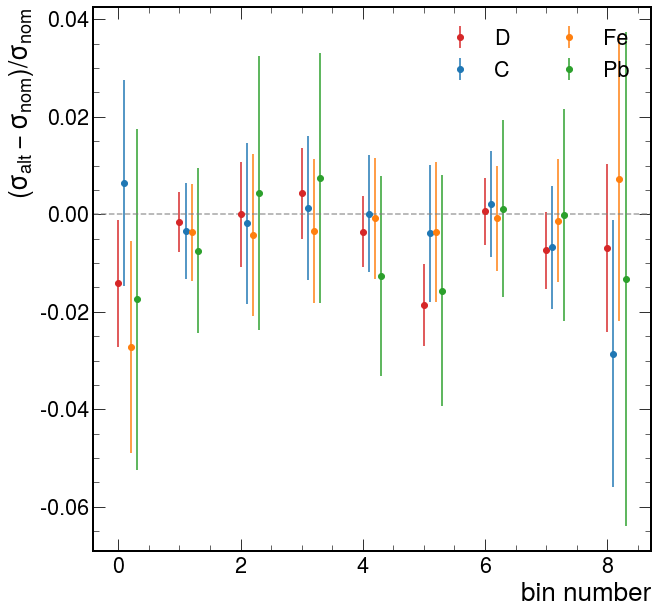

In [33]:
colors={'D':"tab:red", 'C':"tab:blue", 'Fe':"tab:orange", 'Pb':"tab:green"}
shift=0
for A in "D C Fe Pb".split():
    
    nom = np.array([all_data_nom[i][f'{A}_width'] for i in range(9)])
    alt = np.array([all_data_alt[i][f'{A}_width'] for i in range(9)])
    y=(alt-nom)/nom
    dy= [all_data_nom[i][f'{A}_dwidth_stat'] for i in range(9)]
    x=np.arange(9)+shift
    plt.errorbar(x, y, dy, color=colors[A], linestyle='', label=A, marker='o')
    shift+=.1
plt.legend(ncol=2)
plt.xlabel('bin number')
plt.ylabel(r'$(\sigma_{\rm alt}-\sigma_{\rm nom})/\sigma_{\rm nom}$')
plt.axhline(0, linestyle='--', color='0.5', alpha=0.7)